## Acelerating with GPU and CuPy



  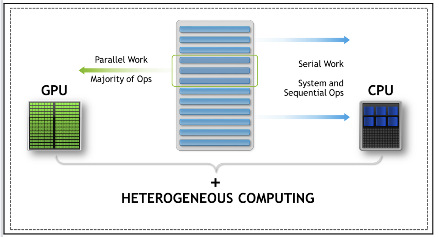

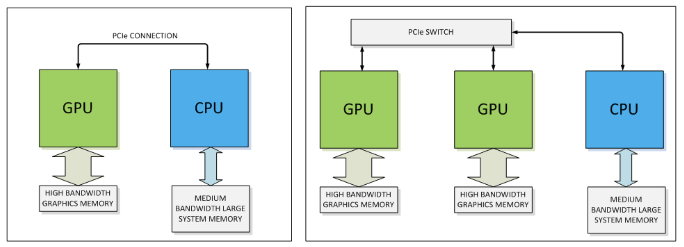

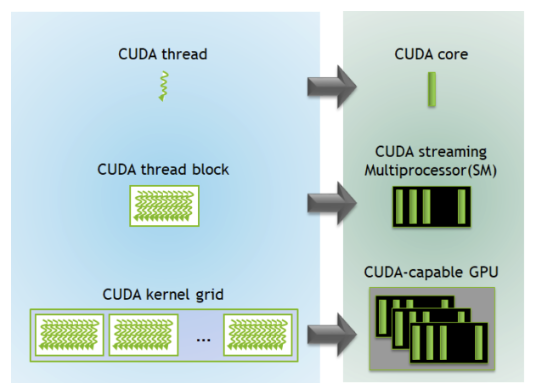


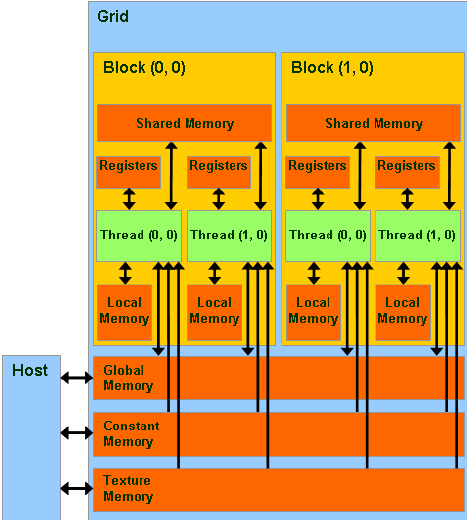


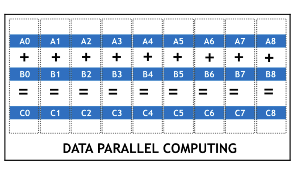


In [ ]:
!nvidia-smi

Tue Apr 30 12:32:48 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!nvcc --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [ ]:
!pip install cupy-cuda12x

In [ ]:
import time
import numpy as np

# NumPy and CPU Runtime
s = time.time()
x_cpu = np.ones((1000, 100, 1000))
np_result = np.sqrt(np.sum(x_cpu**2, axis=-1))
e = time.time()
np_time = e - s
print("Time consumed by NumPy: ", np_time)

Time consumed by NumPy:  0.48064470291137695


In [ ]:
import cupy as cp

# CuPy and GPU Runtime
s = time.time()
x_gpu = cp.ones((1000, 100, 1000))
cp_result = cp.sqrt(cp.sum(x_gpu**2, axis=-1))
e = time.time()
print(cp_result)
cp_time = e - s
print("\nTime consumed by CuPy: ", cp_time)

[[31.6227766 31.6227766 31.6227766 ... 31.6227766 31.6227766 31.6227766]
 [31.6227766 31.6227766 31.6227766 ... 31.6227766 31.6227766 31.6227766]
 [31.6227766 31.6227766 31.6227766 ... 31.6227766 31.6227766 31.6227766]
 ...
 [31.6227766 31.6227766 31.6227766 ... 31.6227766 31.6227766 31.6227766]
 [31.6227766 31.6227766 31.6227766 ... 31.6227766 31.6227766 31.6227766]
 [31.6227766 31.6227766 31.6227766 ... 31.6227766 31.6227766 31.6227766]]

Time consumed by CuPy:  0.0019311904907226562


In [ ]:
diff = np_time/cp_time
print(f'\nCuPy is {diff: .2f} X time faster than NumPy')


CuPy is  118.78 X time faster than NumPy


### Kernels



In [ ]:
squared_diff = cp.ElementwiseKernel(
   'float32 x, float32 y',
   'float32 z',
   'z = (x - y) * (x-y)',
   'squared_diff')

In [ ]:
x = cp.arange(10, dtype=np.float32).reshape(2, 5)
y = cp.arange(5, dtype=np.float32)
squared_diff(x, y)

array([[ 0.,  0.,  0.,  0.,  0.],
       [25., 25., 25., 25., 25.]], dtype=float32)

### Redes Feedforward


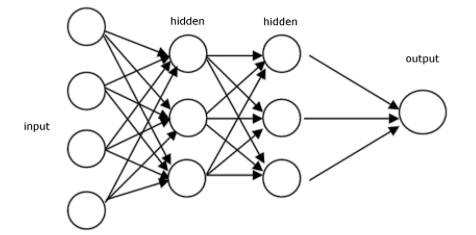


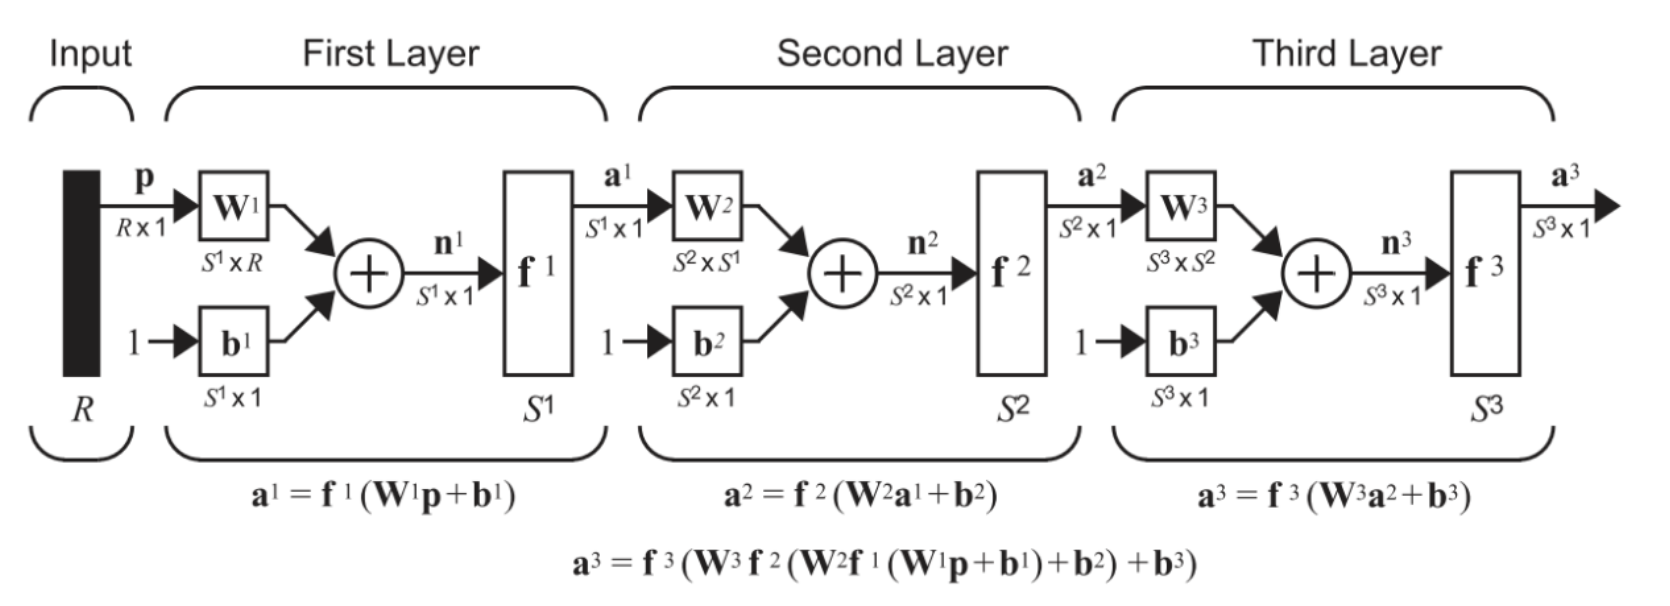


### Automatic differentiation



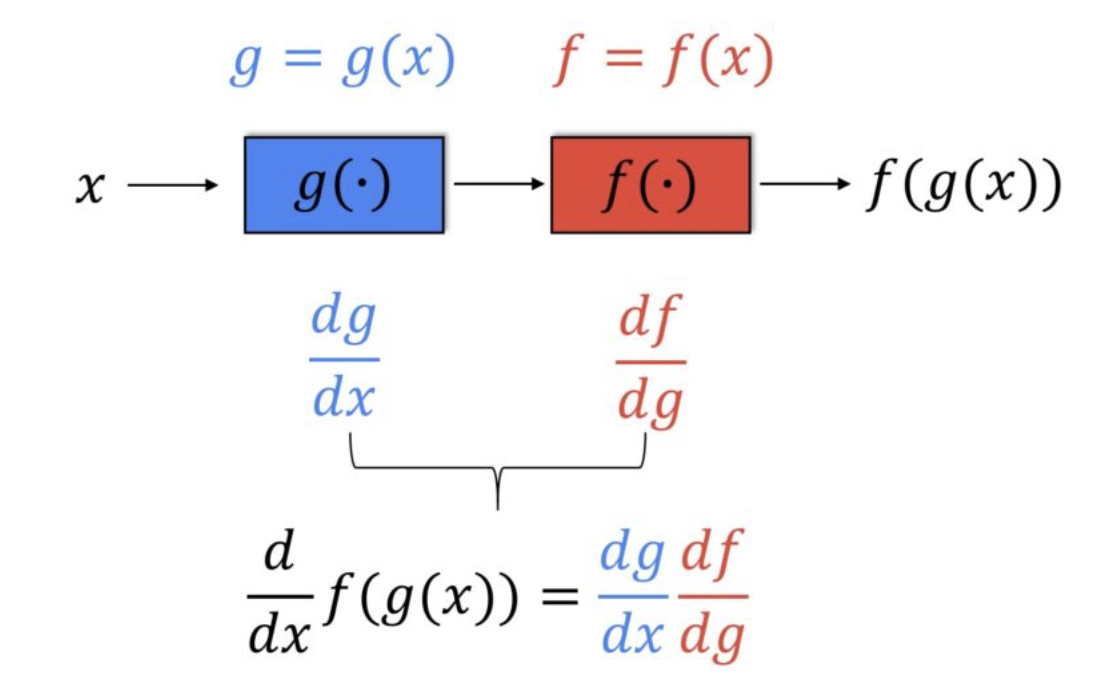




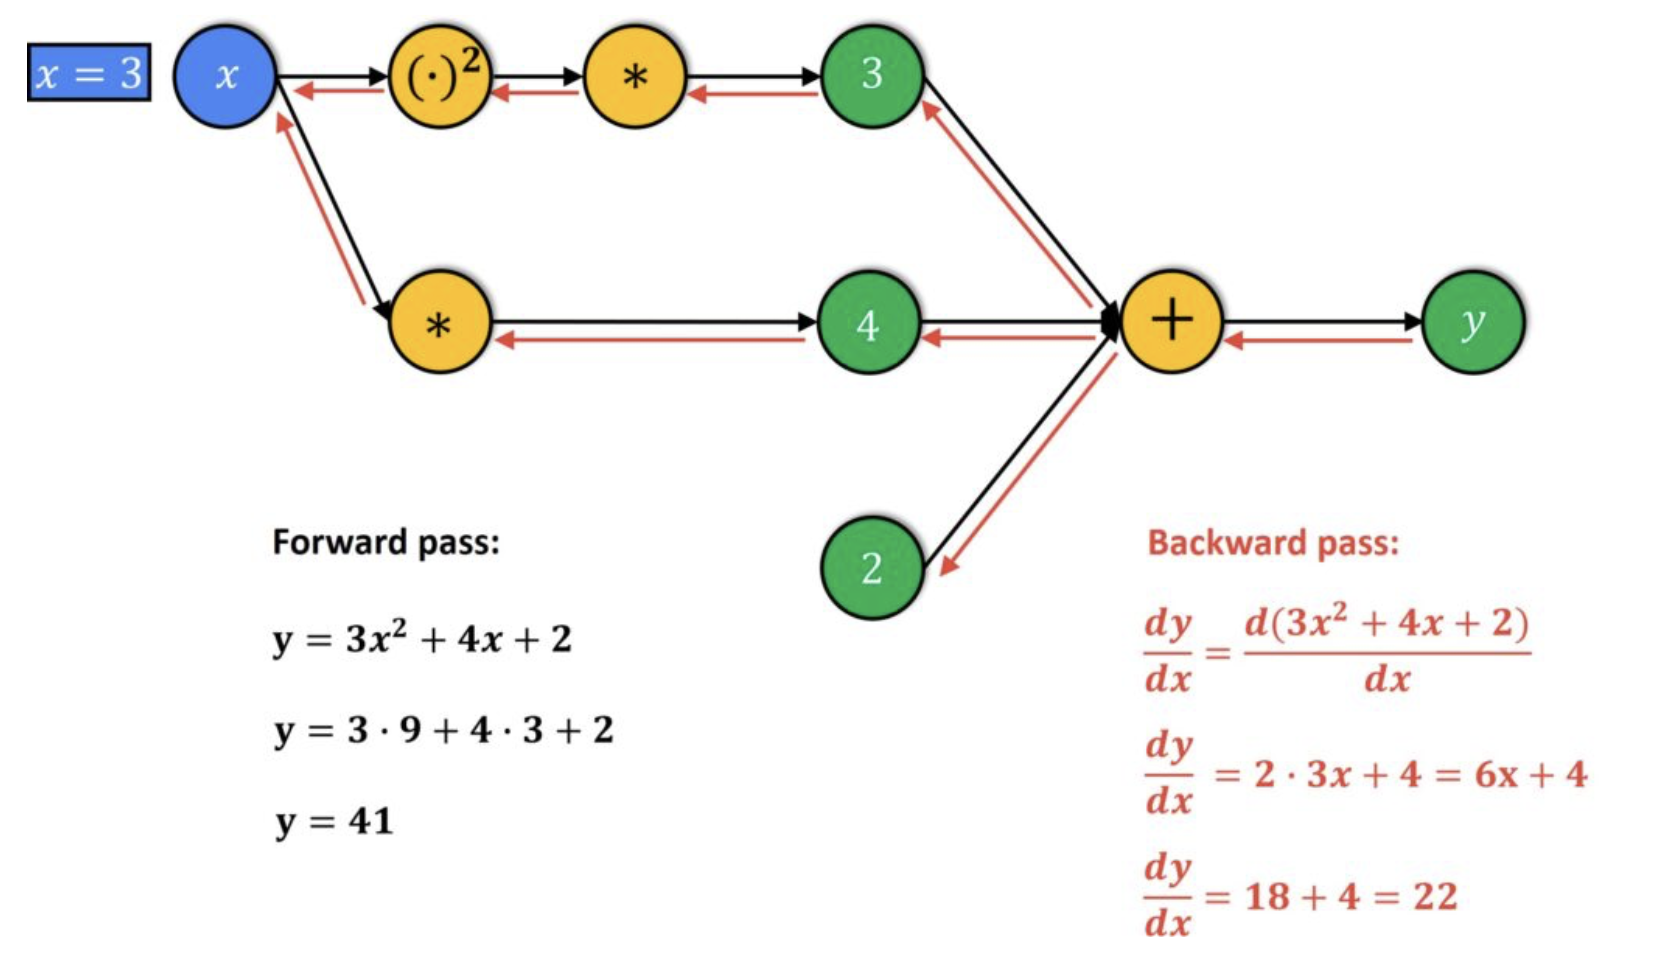


In [ ]:
import torch
torch.cuda.is_available()

False

In [ ]:
x = torch.tensor(3., requires_grad=True)
y = 3*x**2 + 4*x + 2
print(y)

tensor(41., grad_fn=<AddBackward0>)


In [ ]:
y.backward()
print(x.grad)

tensor(22.)


* Other example


In [ ]:
import torch

a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

We create another tensor `Q` from `a` and `b`.

$$Q = 3a^3 - b^2$$



In [ ]:
Q = 3*a**3 - b**2

Let\'s assume `a` and `b` to be parameters of an NN, and `Q` to be the
error. In NN training, we want gradients of the error w.r.t. parameters,
i.e.

$$\frac{\partial Q}{\partial a} = 9a^2$$

$$\frac{\partial Q}{\partial b} = -2b$$

When we call `.backward()` on `Q`, autograd calculates these gradients
and stores them in the respective tensors\' `.grad` attribute.

We need to explicitly pass a `gradient` argument in `Q.backward()`
because it is a vector. `gradient` is a tensor of the same shape as `Q`,
and it represents the gradient of Q w.r.t. itself, i.e.

$$\frac{dQ}{dQ} = 1$$

Equivalently, we can also aggregate Q into a scalar and call backward
implicitly, like `Q.sum().backward()`.



In [ ]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

In [ ]:
# check if collected gradients are correct
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])
